# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
#import gzip
#import pandas as pd

#def parse(path):
#    g = gzip.open(path, 'r')
#    for l in g:
#        yield eval(l)

**Reviews**

In [2]:
#contador = 0
#data_reviews = []
## Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
## abrira uno de cada tres, y asi.
#n = 10
#for l in parse('steam_reviews.json.gz'):
#    if contador%n == 0:
#        data_reviews.append(l)
#    else:
#        pass
#    contador += 1
#data_reviews = pd.DataFrame(data_reviews)
#if True:
#    data_reviews.to_csv("data_reviews.csv", index=False, encoding="utf-8")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
data_reviews = pd.read_csv("data_reviews.csv", converters={'username': str, 'text': str})

In [5]:
data_reviews.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,7.656120e+16,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,7.656120e+16,NaN,NaN


In [6]:
data_reviews.shape

(779307, 12)

In [7]:
data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

**Games**

In [8]:
#data_games = []
#for l in parse('steam_games.json.gz'):
#    data_games.append(l)
#data_games = pd.DataFrame(data_games)
#data_games.to_csv("data_games.csv", index=False)

In [9]:
data_games = pd.read_csv("data_games.csv")

In [10]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [11]:
data_games[data_games.id == 35140]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"['Single-player', 'Steam Achievements', 'Steam...",19.99,False,35140.0,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91.0


In [12]:
data_games[data_games.id == 725280]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
14173,Vyacheslav Shilikhin,"['Action', 'Adventure', 'Indie', 'Simulation']",Psi Project,Psi Project,http://store.steampowered.com/app/725280/Psi_P...,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",NaN,http://steamcommunity.com/app/725280/reviews/?...,"['Single-player', 'Steam Trading Cards']",2.99,False,725280.0,Vyacheslav Shilikhin,Positive,NaN


# 1. Análisis Exploratorio de datos

Primero haré una exploración de algunas cosas como los nulos y algunos value counts interesantes

In [13]:
data_games.isna().sum()

publisher          8062
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29528
dtype: int64

In [14]:
data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

In [15]:
data_reviews["product_id"].value_counts(dropna=False)

440       18373
252490    10221
49520      7321
377160     7113
271590     5976
          ...  
700460        1
532950        1
410470        1
746430        1
423180        1
Name: product_id, Length: 12665, dtype: int64

Top 50 product_id reviews

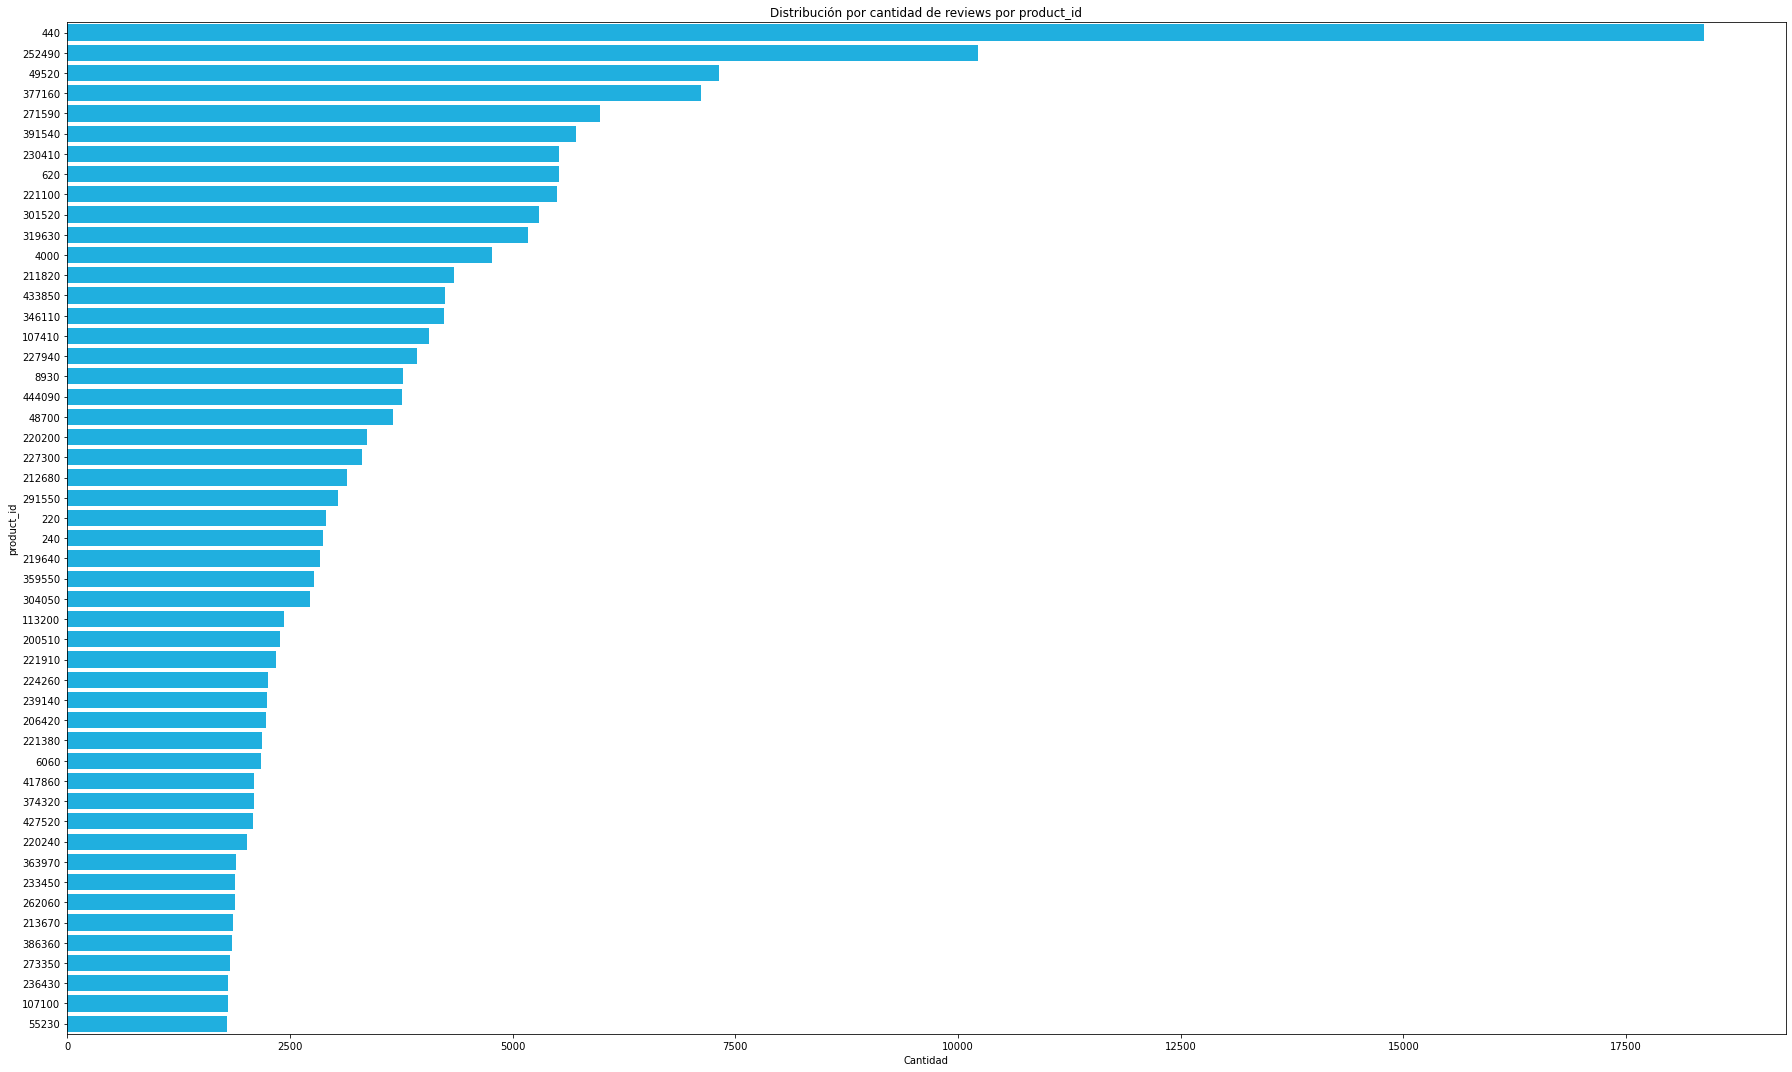

In [16]:
plt.figure(figsize=(25,15))
sns.countplot(data = data_reviews, y = "product_id", order= data_reviews["product_id"].value_counts().index[:50,], color='deepskyblue') 
plt.title("Distribución por cantidad de reviews por product_id")
plt.xlabel("Cantidad")
plt.ylabel("product_id")
plt.tight_layout()
plt.show()

El product_id "440" es el que tiene mayor cantidad de reviews, vamos a ver algunos de ellos y sus usuarios.

In [17]:
data_reviews[data_reviews.product_id == 440]

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
355649,soup man,2855.8,65.0,440,2,2018-01-05,1,False,1,NaN,NaN,NaN
355670,The Detective,536.1,15.0,440,2,2018-01-05,One of the best games for me from 2014-2015,False,2,7.656120e+16,NaN,NaN
355713,chuu :3,19.6,3.0,440,0,2018-01-05,gg,False,4,NaN,NaN,1.0
355717,Apex,8.7,1.0,440,6,2018-01-05,The game is ok,False,4,7.656120e+16,NaN,NaN
355719,A Robot Chicken Nugget,550.0,48.0,440,9,2018-01-05,This game makes me salty with F2Ps n' Tryhards...,False,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
396838,Garan,133.3,NaN,440,4,2014-08-27,"I mean, it IS a war-themed hat simulator...",False,18367,NaN,NaN,NaN
396839,..::ANKH::..cro,325.3,6.0,440,4,2014-08-27,the best free game on steam at least for me......,False,18368,7.656120e+16,NaN,NaN
396840,ruz130,793.0,24.0,440,4,2014-08-26,Best game I've played in a while. Definitely g...,False,18369,7.656120e+16,NaN,NaN
396841,Victus,724.9,29.0,440,4,2014-08-27,"I have three words for ya Fun,awesome and Addi...",False,18370,7.656120e+16,NaN,NaN


Vamos que los usuarios pasan una buena cantidad de horas jugando este producto, y tiene reviews que denotan apreciacion por este, cosas como "the best game", y cosas por el estilo.

Revisemos el nombre del juego

In [18]:
data_games[data_games.id == 440]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"['Action', 'Free to Play']",Team Fortress 2,Team Fortress 2,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"['Multi-player', 'Cross-Platform Multiplayer',...",Free to Play,False,440.0,Valve,Very Positive,92.0


Tiene un "sentiment" muy positivo que lo pudimos corroborar con lo anteriormente analizado debido a la cantidad de horas jugadas.

Voy a revisar si la column "Sentiment" en "data_games" me puede ayudar a crear un valor de calificación

In [19]:
data_games["sentiment"].value_counts(dropna=False)

NaN                        7182
Mixed                      4103
Very Positive              3868
Positive                   3281
Mostly Positive            2744
1 user reviews             2496
2 user reviews             1756
3 user reviews             1231
4 user reviews              964
5 user reviews              846
Mostly Negative             802
6 user reviews              756
7 user reviews              619
8 user reviews              537
9 user reviews              488
Overwhelmingly Positive     303
Negative                    123
Very Negative                29
Overwhelmingly Negative       7
Name: sentiment, dtype: int64

Como podemos ver, esto no nos ayuda a crear un valor de calificación, ya que tampoco nos dice los usuarios que dieron ese sentimiento o review, por ende no lo podemos usar.

In [20]:
data_games[data_games.sentiment == 'Very Positive']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
27,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,Carmageddon Max Pack,http://store.steampowered.com/app/282010/Carma...,1997-06-30,"['Racing', 'Action', 'Classic', 'Indie', 'Gore...",NaN,http://steamcommunity.com/app/282010/reviews/?...,"['Single-player', 'Multi-player', 'Steam Tradi...",9.99,False,282010.0,Stainless Games Ltd,Very Positive,NaN
40,Strategy First,['Strategy'],Disciples II: Rise of the Elves,Disciples II: Rise of the Elves,http://store.steampowered.com/app/1630/Discipl...,2006-07-06,"['Strategy', 'Turn-Based Strategy', 'Fantasy',...",NaN,http://steamcommunity.com/app/1630/reviews/?br...,"['Single-player', 'Multi-player', 'Co-op']",6.99,False,1630.0,Strategy First,Very Positive,80.0
41,Blazing Griffin Ltd.,"['Action', 'Indie', 'RPG']",The Ship: Murder Party,The Ship: Murder Party,http://store.steampowered.com/app/2400/The_Shi...,2006-07-11,"['Multiplayer', 'Indie', 'Action', 'First-Pers...",NaN,http://steamcommunity.com/app/2400/reviews/?br...,"['Single-player', 'Multi-player', 'Steam Tradi...",9.99,False,2400.0,Outerlight Ltd.,Very Positive,76.0
56,Introversion Software,"['Indie', 'Strategy']",DEFCON,DEFCON,http://store.steampowered.com/app/1520/DEFCON/,2006-09-29,"['Strategy', 'Indie', 'Multiplayer', 'Wargame'...",NaN,http://steamcommunity.com/app/1520/reviews/?br...,"['Single-player', 'Multi-player']",9.99,False,1520.0,Introversion Software,Very Positive,84.0
60,Unknown Worlds Entertainment,"['Casual', 'Indie']",Zen of Sudoku,Zen of Sudoku,http://store.steampowered.com/app/4900/Zen_of_...,2006-12-14,"['Casual', 'Indie', 'Puzzle']",NaN,http://steamcommunity.com/app/4900/reviews/?br...,['Single-player'],Free,False,4900.0,Unknown Worlds Entertainment,Very Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32108,Valve,['Action'],Deathmatch Classic,Deathmatch Classic,http://store.steampowered.com/app/40/Deathmatc...,2001-06-01,"['Action', 'FPS', 'Multiplayer', 'Classic', 'S...",NaN,http://steamcommunity.com/app/40/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,False,40.0,Valve,Very Positive,NaN
32109,Valve,['Action'],Half-Life: Blue Shift,Half-Life: Blue Shift,http://store.steampowered.com/app/130/HalfLife...,2001-06-01,"['FPS', 'Action', 'Sci-fi', 'Singleplayer', 'S...",NaN,http://steamcommunity.com/app/130/reviews/?bro...,['Single-player'],4.99,False,130.0,Gearbox Software,Very Positive,71.0
32110,Spiderweb Software,"['Strategy', 'RPG', 'Indie']",Geneforge 1,Geneforge 1,http://store.steampowered.com/app/200960/Genef...,2001-12-01,"['RPG', 'Indie', 'Strategy', 'Isometric', 'Tur...",NaN,http://steamcommunity.com/app/200960/reviews/?...,['Single-player'],19.99,False,200960.0,Spiderweb Software,Very Positive,NaN
32114,Valve,['Action'],Day of Defeat,Day of Defeat,http://store.steampowered.com/app/30/Day_of_De...,2003-05-01,"['FPS', 'World War II', 'Multiplayer', 'Action...",NaN,http://steamcommunity.com/app/30/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,False,30.0,Valve,Very Positive,79.0


In [21]:
data_reviews["username"].value_counts(dropna=False)

123             213
Alex            190
Chris           155
Nick            143
Matt            137
               ... 
oomzer            1
SBFD              1
BEȦTDUCK          1
Trojan Norse      1
Sad Samoyed       1
Name: username, Length: 540341, dtype: int64

In [22]:
data_reviews[data_reviews.username == '123']

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
2951,123,484.1,69.0,271590,1,2017-12-30,"Don't buy. They don't bother fixing bugs, only...",False,107,7.656120e+16,NaN,NaN
9404,123,34.2,81.0,35720,8,2017-12-29,An original platformer with beautiful medieval...,False,2,7.656120e+16,NaN,NaN
13587,123,69.3,1.0,271590,2,2017-09-15,Nice game ever,False,1263,7.656120e+16,NaN,1.0
17424,123,26.7,91.0,337000,8,2016-10-07,Game is garbage! Dont Buy it you will just be ...,False,458,7.656120e+16,NaN,NaN
23996,123,19.4,98.0,389730,2,2017-12-26,first match i get into it puts me against play...,False,11,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
769784,123,702.0,74.0,252490,4,2016-03-14,This Game is crazy... you start at a beach wit...,True,4946,NaN,NaN,1.0
771147,123,436.6,41.0,221100,6,2015-06-10,Great survival game. The Early Access business...,True,3759,NaN,NaN,NaN
771314,123,324.3,85.0,221100,0,2015-06-04,It's all about surviving.\nThe only goal in th...,True,3803,NaN,NaN,NaN
775526,123,4189.3,17.0,252490,1,2015-04-03,Nab :D,True,6714,NaN,NaN,2.0


In [23]:
data_reviews[data_reviews.username == 'Alex']

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
1571,Alex,1.8,86.0,271860,1,2015-05-30,Давально интиресная игра,False,11,NaN,NaN,1.0
13020,Alex,0.1,115.0,531960,2,2016-10-03,woah!,False,27,7.656120e+16,NaN,NaN
14130,Alex,7.8,174.0,225080,5,2017-05-19,"Glad I took the time to place this. Sure, the ...",False,137,NaN,NaN,NaN
16914,Alex,257.8,44.0,271590,0,2017-07-11,It's a very bad game for those who want to pla...,False,1766,NaN,NaN,NaN
19462,Alex,1.6,140.0,200710,6,2015-06-18,A parody of diablo,False,450,7.656120e+16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
766865,Alex,60.1,384.0,252490,3,2016-07-12,I don't play many of these types of survival g...,True,4233,NaN,NaN,NaN
766887,Alex,60.1,384.0,252490,3,2016-07-12,I don't play many of these types of survival g...,True,4238,NaN,NaN,NaN
769574,Alex,16.8,3.0,391540,3,2016-02-02,FIRST OFF THE GAME IS REEEEEEALY GOOD Toby NEX...,False,3914,7.656120e+16,NaN,NaN
770379,Alex,18.8,283.0,221100,3,2015-07-06,Buggy doesnt even begin to describe.,True,3567,NaN,NaN,NaN


Después de haber hecho unos análisis preliminares muy por encima de los datos, más que todo para revisar que el product_id que aparece en "data_reviews" si son los "id" de los juegos que aparecen en "data_reviews", revisar la cantidad de nulos y un análisis preliminar para dar un valor de calificación. 

In [24]:
# Haremos una copia de ambos df para no modificar la información inicial

data_reviews1 = data_reviews.copy()
data_games1 = data_games.copy()

In [25]:
data_reviews.username.value_counts()

123             213
Alex            190
Chris           155
Nick            143
Matt            137
               ... 
oomzer            1
SBFD              1
BEȦTDUCK          1
Trojan Norse      1
Sad Samoyed       1
Name: username, Length: 540341, dtype: int64

Tenemos 540338 usuarios que hicieron reviews

De lo anterior sabemos que no todos los usernames tienen su propio user_id, por ende debemos crearle uno a cada username así como también debemos crear un valor calificativo a cada review que hacen por producto, por ende vamos a filtrar lo que necesitamos para esto

In [26]:
data_reviews_user = data_reviews1.copy()
data_reviews_user.drop(columns=['date', 'products','page_order','text','early_access','compensation','found_funny','page', 'user_id'], inplace=True)
data_reviews_user

,username,hours,product_id
0,Chaos Syren,0.1,725280
1,Ariman1,13.2,328100
2,freakfantom,0.1,725280
3,The_Cpt_FROGGY,7.8,631920
4,the_maker988,8.2,35140
...,...,...,...
779302,Vidaar,783.5,252490
779303,Nikolai Belinski,55.1,252490
779304,RancorZealot,203.5,252490
779305,Jerry,139.8,252490


In [27]:
data_reviews_user.isna().sum()

username         0
hours         2637
product_id       0
dtype: int64

## User_ir para cada username

Esto lo hacemos ya que la columna user_id del dataset "data_reviews" tiene una gran cantidad de nulos, por ende los usernames no tienen su respectivo user_id. Así que vamos a crearle uno a cada uno

In [28]:
import numpy as np
usuarios=data_reviews_user['username'].unique()
username_id=pd.DataFrame(usuarios,columns=['username'])   
finRango=len(username_id)+1
user_id=np.array(range(1,finRango,1))
username_id['user_id']=user_id
username_id

,username,user_id
0,Chaos Syren,1
1,Ariman1,2
2,freakfantom,3
3,The_Cpt_FROGGY,4
4,the_maker988,5
...,...,...
540336,Seikleja,540337
540337,KindAlcoholic,540338
540338,SepticFalcon,540339
540339,RancorZealot,540340


Como podemos ver cada username tiene su propio user_id empezando desde 1 hasta 540339

In [29]:
data_reviews_user=data_reviews_user.merge(username_id, left_on='username', right_on='username')

In [30]:
data_reviews_user

,username,hours,product_id,user_id
0,Chaos Syren,0.1,725280,1
1,Ariman1,13.2,328100,2
2,Ariman1,0.5,521230,2
3,Ariman1,2.0,493980,2
4,freakfantom,0.1,725280,3
...,...,...,...,...
779302,Seikleja,80.8,252490,540337
779303,KindAlcoholic,1303.6,252490,540338
779304,SepticFalcon,334.9,252490,540339
779305,RancorZealot,203.5,252490,540340


In [31]:
data_reviews_user.isna().sum()

username         0
hours         2637
product_id       0
user_id          0
dtype: int64

De esta manera podemos darle un valor de calificación según la cantidad de horas jugadas que tiene un usuario por producto, es decir la cantidad de horas que cada usuario jugo cada uno de los juegos va a hacer el valor calificativo que cada usuario le da al juego. Si un usuario jugó 0.1 horas un juego, para este usuario ese determinado juego no fue de su gusto ya que al haber jugado durante 6 minutos no lo captivo.

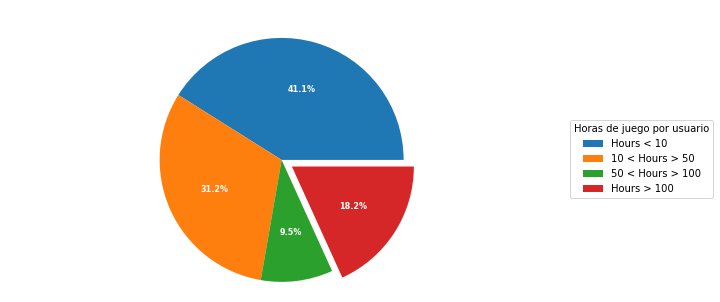

In [32]:
import numpy as np

horasmenor10=len(data_reviews_user[data_reviews_user.hours<10])
horas10a50=len(data_reviews_user[(data_reviews_user.hours>10)&(data_reviews_user.hours<50)])
horas50a100=len(data_reviews_user[(data_reviews_user.hours>50)&(data_reviews_user.hours<100)])
horasmayor100=len(data_reviews_user[data_reviews_user.hours>100])

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

recipe = ['Hours < 10', '10 < Hours > 50', '50 < Hours > 100', 'Hours > 100']

data = [horasmenor10, horas10a50, horas50a100, horasmayor100]
ingredients = ['Hours < 10', '10 < Hours > 50', '50 < Hours > 100', 'Hours > 100']
explode = (0, 0, 0, 0.1)



wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',
                                  textprops=dict(color="w"),explode=explode)

ax.legend(wedges, ingredients,
          title="Horas de juego por usuario",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Horas de juego por usuario", color="w")
ax.axis('equal')

plt.show()

Hay casi un 20% de los usuarios que jugaron más de 100 horas algunos juegos, por ende esto no se puede tratar como outliers, así como aquellos jugadores que jugaron juegos menos de 10 horas. Estas horas podrían ayudarnos a sacar score por usuario por juego. 

Por ende, agregaremos una columna de más que diga "score"

In [33]:
data_reviews_user['score']=0 #llena de 0 por ahora
data_reviews_user.head()

,username,hours,product_id,user_id,score
0,Chaos Syren,0.1,725280,1,0
1,Ariman1,13.2,328100,2,0
2,Ariman1,0.5,521230,2,0
3,Ariman1,2.0,493980,2,0
4,freakfantom,0.1,725280,3,0


Ahora entreguemosle un valor de 1 a 10 según la cantidad de horas jugadas

In [34]:
import warnings
warnings.filterwarnings('ignore')

rank=[10,20,30,40,50,60,70,80,90]

for valor in rank:
    data_reviews_user['score'][(data_reviews_user.hours>(valor-10)) & (data_reviews_user.hours<=valor)]=(valor/10)

data_reviews_user['score'][(data_reviews_user.hours>=100)]=10
data_reviews_user

,username,hours,product_id,user_id,score
0,Chaos Syren,0.1,725280,1,1
1,Ariman1,13.2,328100,2,2
2,Ariman1,0.5,521230,2,1
3,Ariman1,2.0,493980,2,1
4,freakfantom,0.1,725280,3,1
...,...,...,...,...,...
779302,Seikleja,80.8,252490,540337,9
779303,KindAlcoholic,1303.6,252490,540338,10
779304,SepticFalcon,334.9,252490,540339,10
779305,RancorZealot,203.5,252490,540340,10


Ahora veamos su distribución

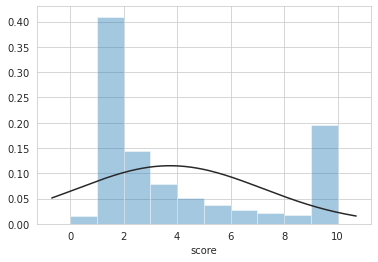

In [35]:
from scipy.stats import norm
sns.set_style("whitegrid")
data = data_reviews_user.score
ax = sns.distplot(data, fit=norm, kde=False, bins=10)

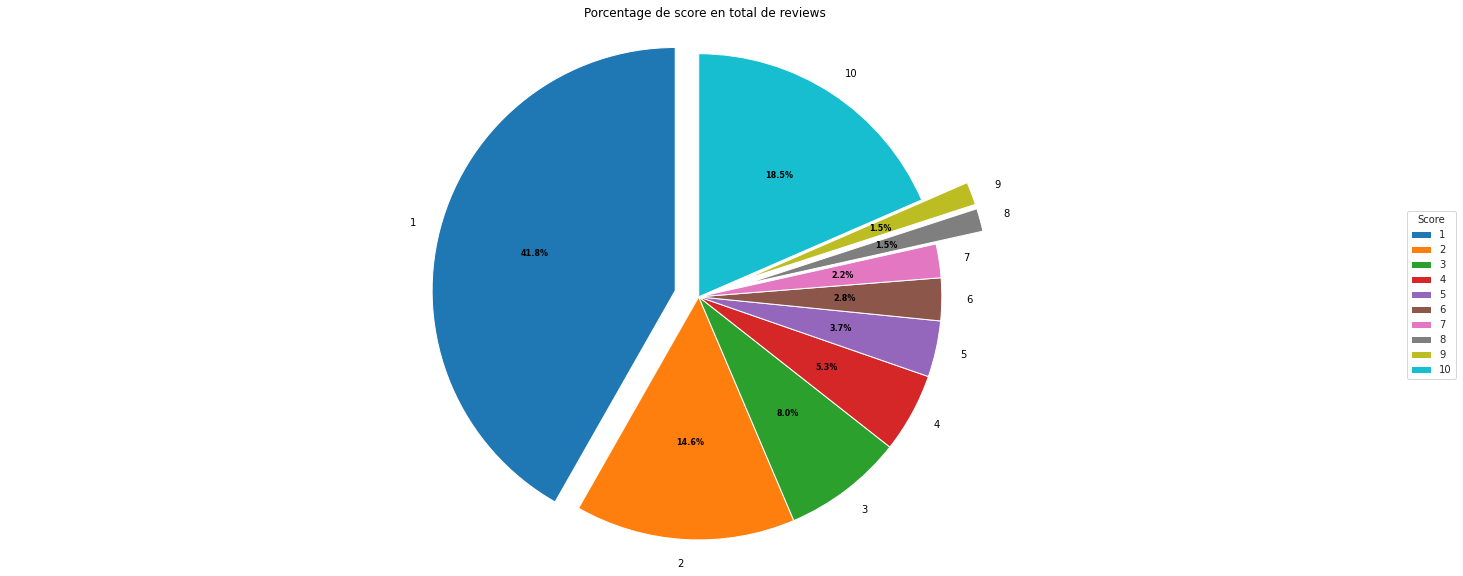

In [36]:
score_1=len(data_reviews[data_reviews_user.score==1])
score_2=len(data_reviews[data_reviews_user.score==2])
score_3=len(data_reviews[data_reviews_user.score==3])
score_4=len(data_reviews[data_reviews_user.score==4])
score_5=len(data_reviews[data_reviews_user.score==5])
score_6=len(data_reviews[data_reviews_user.score==6])
score_7=len(data_reviews[data_reviews_user.score==7])
score_8=len(data_reviews[data_reviews_user.score==9])
score_9=len(data_reviews[data_reviews_user.score==9])
score_10=len(data_reviews[data_reviews_user.score==10])


fig, ax = plt.subplots(figsize=(25, 10), subplot_kw=dict(aspect="equal"))

recipe = [1,2,3,4,5,6,7,8,9,10]

data = [score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10]
ingredients = [1,2,3,4,5,6,7,8,9,10]
explode = (0.1,0,0,0,0,0,0,0.2,0.2,0)



wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', labels= recipe,
                                  textprops=dict(color="black"),explode=explode, startangle=90)

ax.legend(wedges, ingredients,
          title="Score",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Porcentage de score en total de reviews", color="black")
ax.axis('equal')

plt.show()

Podemos ver que hay una buena cantidad de gente que jugó juegos por menos de 10 horas y así como hay muchos otros que jugaron por más de 100 horas.

Busquemos cuantos fueron por cada uno solo por analizar. 

In [37]:
data_reviews_user[data_reviews_user.score == 10]

,username,hours,product_id,user_id,score
148,Hanzo,243.0,287290,16,10
166,Harry,144.7,377160,17,10
169,Harry,2257.4,440,17,10
174,Harry,308.4,213850,17,10
180,Harry,955.4,252490,17,10
...,...,...,...,...,...
779301,Reventing BETS.gg,959.3,252490,540336,10
779303,KindAlcoholic,1303.6,252490,540338,10
779304,SepticFalcon,334.9,252490,540339,10
779305,RancorZealot,203.5,252490,540340,10


Tenemos 141205 reviews en 10, vamos a ver cual es el juego con la mayor cantidad de reviews con el score en 10, osea que los usuarios jugaron más de 100 horas.

También, ya que las horas las usamos para sacar el score, podemos eliminar esa columna.

In [38]:
data_reviews_user = data_reviews_user.drop(columns=["hours"])
data_reviews_user

,username,product_id,user_id,score
0,Chaos Syren,725280,1,1
1,Ariman1,328100,2,2
2,Ariman1,521230,2,1
3,Ariman1,493980,2,1
4,freakfantom,725280,3,1
...,...,...,...,...
779302,Seikleja,252490,540337,9
779303,KindAlcoholic,252490,540338,10
779304,SepticFalcon,252490,540339,10
779305,RancorZealot,252490,540340,10


In [39]:
data_reviews_user[data_reviews_user.score == 10]["product_id"].value_counts().to_frame()

,product_id
440,12966
252490,6269
377160,4262
230410,3727
49520,3473
...,...
521150,1
312280,1
251450,1
329440,1


In [40]:
Top10_score10 = data_reviews_user[data_reviews_user.score == 10]["product_id"].value_counts().to_frame().reset_index().rename(columns={"index":"product_id","product_id":"Cuenta"}).head(10)
Top10_score10

,product_id,Cuenta
0,440,12966
1,252490,6269
2,377160,4262
3,230410,3727
4,49520,3473
5,271590,3395
6,4000,2975
7,107410,2793
8,221100,2642
9,346110,2590


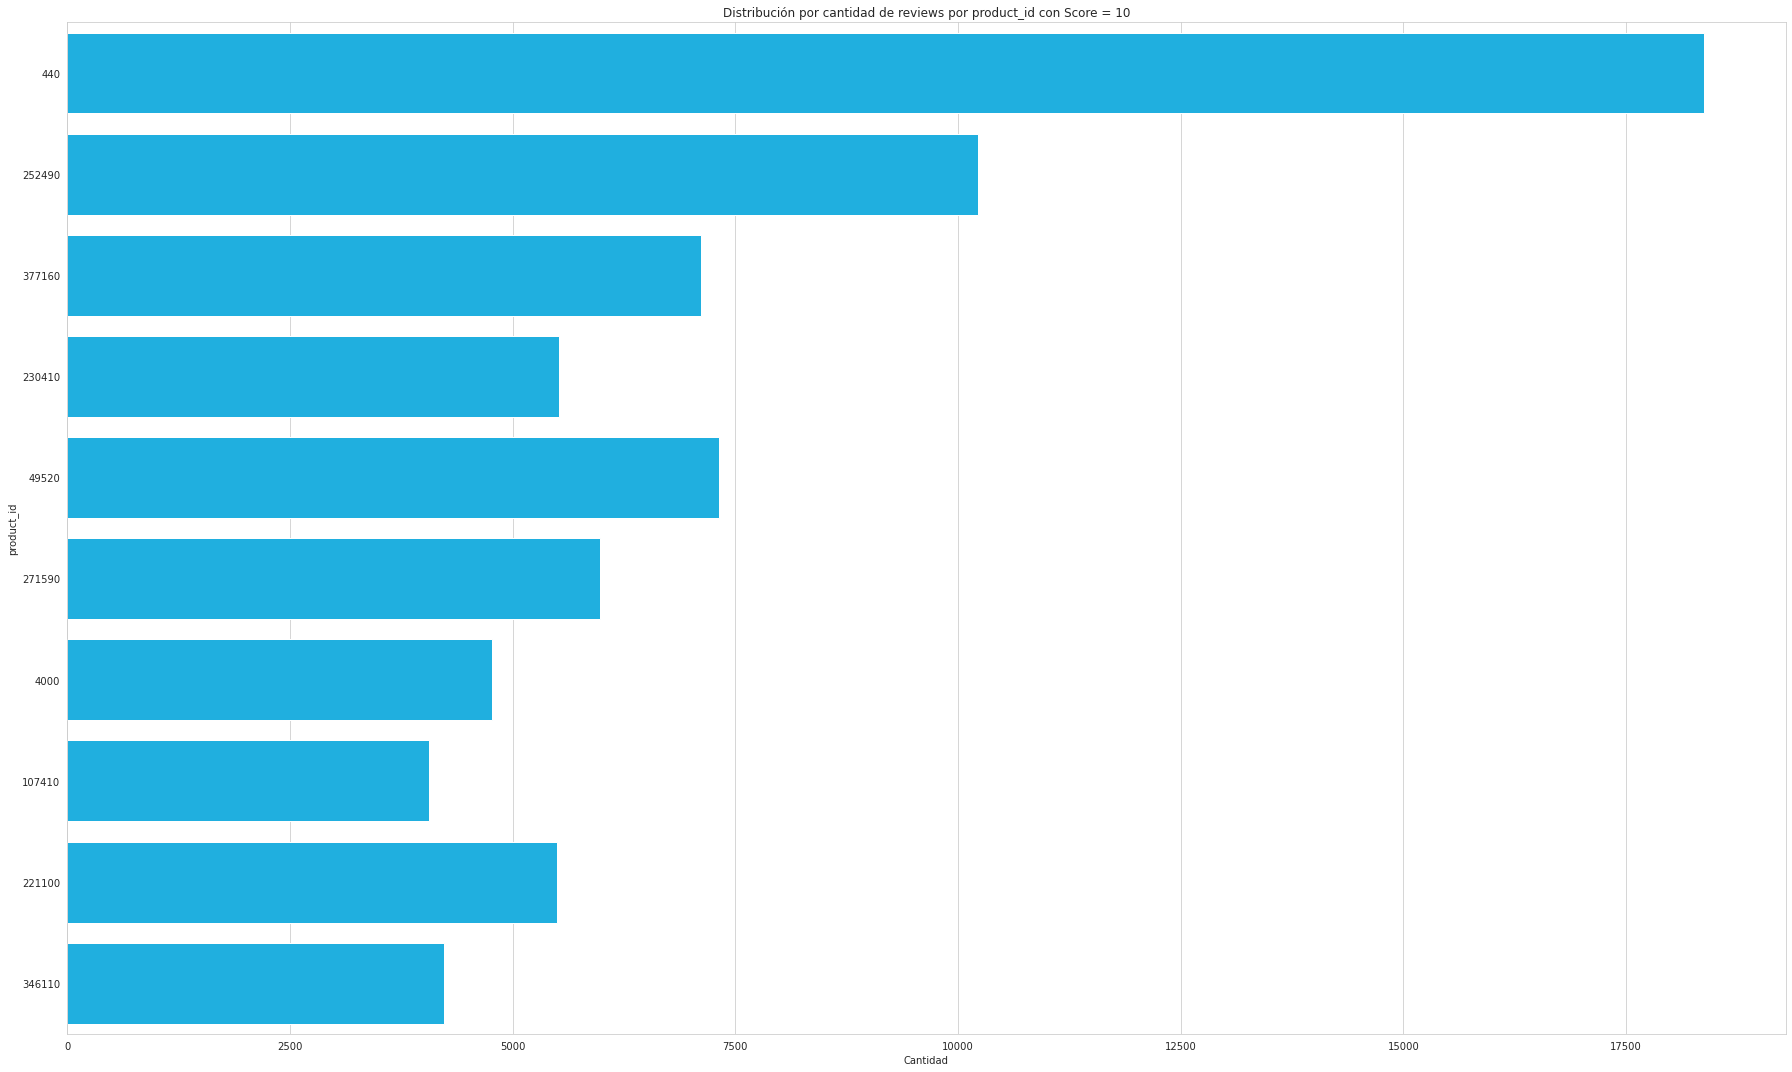

In [41]:
plt.figure(figsize=(25,15))
sns.countplot(data = data_reviews_user, y = "product_id", order= data_reviews_user[data_reviews_user.score == 10]["product_id"].value_counts(ascending=False).index[:10,], color='deepskyblue') 
plt.title("Distribución por cantidad de reviews por product_id con Score = 10")
plt.xlabel("Cantidad")
plt.ylabel("product_id")
plt.tight_layout()
plt.show()

El product_id 440 fue el más jugado y por ende con la mayor cantidad de score en 10 por sus horas de juego.

In [42]:
data_reviews_user.isna().sum()

username      0
product_id    0
user_id       0
score         0
dtype: int64

### Data_Games

Vamos a analizar y proceder a lo mismo que hicimos con el dataset de revies, vamos a filtrar por lo que necesitamos y crear el dataframe a trbajar

In [43]:
data_games_rev =  data_games.copy()
data_games_rev.head(2)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN


Del anterior dataset, vamos a revisar los nulos y de esta forma filtraremos lo que necesitamos.

In [44]:
data_games_rev.isna().sum()

publisher          8062
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29528
dtype: int64

Vamos a usar el nombre de la aplicación, su id y su url, ya que el url al momento de recomendar haria que el usuario vaya directo al url del juego para descargar

In [45]:
data_games_rev.drop(columns=['title','publisher','genres','release_date','tags','discount_price','reviews_url','specs','price','early_access','developer','sentiment','metascore'], inplace=True)
data_games_rev

,app_name,url,id
0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,761140.0
1,Ironbound,http://store.steampowered.com/app/643980/Ironb...,643980.0
2,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,670290.0
3,弹炸人2222,http://store.steampowered.com/app/767400/2222/,767400.0
4,Log Challenge,http://store.steampowered.com/app/773570/Log_C...,773570.0
...,...,...,...
32130,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,773640.0
32131,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,733530.0
32132,Russian Roads,http://store.steampowered.com/app/610660/Russi...,610660.0
32133,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,658870.0


In [46]:
#vamos a revisar los nulos que nos quedan para eventualmente borrarlos, ya que sin el numbre y sin el id no vamos a poder crear sistema de recomendación
data_games_rev.isna().sum()

app_name    2
url         0
id          2
dtype: int64

In [47]:
data_games_rev.dropna(inplace=True)
data_games_rev.isna().sum()

app_name    0
url         0
id          0
dtype: int64

In [48]:
# Vamos a cambiarle ahora el nombre al id por "product id", así podemos hacer un merge más adelante de los dataset a 1 principal
data_games_rev.rename(columns={'id': 'product_id'}, inplace=True)
data_games_rev.head(2)

,app_name,url,product_id
0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,761140.0
1,Ironbound,http://store.steampowered.com/app/643980/Ironb...,643980.0


# 2. Sistema de Recomendación 

Luego de analizar el dataset nos encontramos con 2 tipos de datasets casí iguales que como se hizo en la bitácora #38 usando un filtro colaborativo como nos lo indica las instrucciones. Para esto haré paso a paso lo que se hizo en la bitácora #38 y de ahí mejorar los hiperparametros para tener un mejor modelo.

In [49]:
# Cargamos librerias
import gc #garbage collector
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

## 2.1 Creamos el dataset

In [50]:
reader = Reader(rating_scale=(1, 10))

In [51]:
data_reviews_user.head()

,username,product_id,user_id,score
0,Chaos Syren,725280,1,1
1,Ariman1,328100,2,2
2,Ariman1,521230,2,1
3,Ariman1,493980,2,1
4,freakfantom,725280,3,1


In [52]:
# Vamos a filtrar el dataset como lo necesita la función Reader
df1 = data_reviews_user[["user_id", "product_id","score"]]
df1

,user_id,product_id,score
0,1,725280,1
1,2,328100,2
2,2,521230,1
3,2,493980,1
4,3,725280,1
...,...,...,...
779302,540337,252490,9
779303,540338,252490,10
779304,540339,252490,10
779305,540340,252490,10


In [53]:
# Limitamos el dataset a la N_filas ya que es demasiado extenso, entonces tomaremos un poco más de la mitad
#N_filas = 400000 

data = Dataset.load_from_df(df1[["user_id", "product_id","score"]], reader)

In [54]:
trainset, testset = train_test_split(data, test_size=.20, random_state=42)

In [55]:
testset

[(95251, 104900, 1.0),
 (380147, 435150, 10.0),
 (532389, 252490, 1.0),
 (135889, 319630, 2.0),
 (518667, 730, 7.0),
 (170582, 257510, 6.0),
 (100576, 388090, 1.0),
 (398166, 9420, 0.0),
 (50076, 113200, 10.0),
 (137546, 319630, 4.0),
 (159635, 200210, 10.0),
 (267066, 247730, 1.0),
 (193307, 473690, 1.0),
 (502239, 433340, 3.0),
 (236487, 531640, 9.0),
 (84124, 220, 8.0),
 (177724, 394690, 3.0),
 (500236, 362890, 1.0),
 (100642, 226860, 10.0),
 (74102, 232090, 10.0),
 (155974, 326460, 3.0),
 (385158, 429050, 2.0),
 (444396, 365670, 1.0),
 (400426, 408120, 1.0),
 (522905, 730, 10.0),
 (300550, 440, 10.0),
 (394316, 230410, 10.0),
 (76255, 346110, 10.0),
 (390091, 221910, 1.0),
 (5426, 558420, 1.0),
 (420891, 33930, 10.0),
 (316359, 221810, 10.0),
 (313050, 39120, 0.0),
 (158957, 317060, 1.0),
 (434722, 217750, 4.0),
 (99460, 374320, 2.0),
 (426895, 221910, 1.0),
 (211695, 239820, 4.0),
 (32492, 245490, 2.0),
 (27077, 374990, 1.0),
 (62476, 235540, 6.0),
 (6007, 207610, 2.0),
 (538277, 

## 2.1 Entrenamos 
### SVD

Vamos a entrenar un algoritmo SVD Benchmark para despues mejorar con un Gridsearch de sus hiperparámetros

In [56]:
%%time

from surprise import SVD
algo = SVD()
algo.fit(trainset)

CPU times: user 38.5 s, sys: 1.07 s, total: 39.5 s
Wall time: 47.7 s


### Hacemos las predicciones sobre el testset

In [57]:
predictions = algo.test(testset)

#Probamos
algo.predict(45948,268500)

Prediction(uid=45948, iid=268500, r_ui=None, est=6.543754155899465, details={'was_impossible': False})

## 2.2 Evaluamos el modelo Benchmark

Para esto vamos a usar la métrica accuracy mediante el RMSE, ya que es la que se usó en la bitácora #38 y aparte de eso, es la que nos puede mostrar una mejor medición de error.

In [58]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 2.7068


2.706817565262381

Como podemos ver el RMSE lo podríamos mejorar, vamos a intentarlo

## 2.3 Optimización de hiperparámetros y mejora de la métrica

Para esto vamos a usar un gridsearch. 

Pero, debemos hacer lo que no aplicamos anteriormente limitando el número de instancias a probar, ya que al ser tanta instancias se tarda mucho el gridsearch o en mi caso algunas veces se me cuelga por falta de memoria RAM. Por ende, probaremos con 200k instancias el modelo anterior y trataremos de mejorarlo con un GridSearch.

In [59]:
N_filas = 200000 

data_2 = Dataset.load_from_df(df1[["user_id", "product_id","score"]][:N_filas], reader)
trainset_2, testset_2 = train_test_split(data_2, test_size=.20, random_state=42)
algo_2 = SVD()
algo_2.fit(trainset_2)
predictions_2 = algo_2.test(testset_2)
accuracy.rmse(predictions_2)

RMSE: 2.6135


2.6134567316501163

Mejora un poco 

In [60]:
%%time
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[1,2,3],'n_epochs': [25,27,30], 'lr_all': [0.0015, 0.002],
              'reg_all': [0.01, 0.015,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs = -1, joblib_verbose=5)
gs.fit(data_2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  9.6min finished


CPU times: user 1min 15s, sys: 944 ms, total: 1min 15s
Wall time: 9min 49s


In [61]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.602894006828857
{'n_factors': 1, 'n_epochs': 25, 'lr_all': 0.002, 'reg_all': 0.02}


In [62]:
algo_3 = SVD(n_factors =1,n_epochs=25,lr_all=0.002,reg_all=0.02)
algo_3.fit(trainset_2)
predictions_3 = algo_3.test(testset_2)
accuracy.rmse(predictions_3)

RMSE: 2.6030


2.6030078387424145

Mejora muy poco el RMSE de este modelo

## 2.4 Probamos el algoritmo SVD++

In [63]:
%%time

from surprise import SVDpp
algo_pp = SVDpp()
algo_pp.fit(trainset)

predictions_pp = algo_pp.test(testset)

#Probamos
algo_pp.predict(45948,268500)

CPU times: user 1min 19s, sys: 131 ms, total: 1min 20s
Wall time: 1min 21s


Prediction(uid=45948, iid=268500, r_ui=None, est=10, details={'was_impossible': False})

In [64]:
accuracy.rmse(predictions_pp)

RMSE: 7.1389


7.1389170922689145

### 2.4.1 200k instancias y GridSearch

In [65]:
N_filas = 200000 

data_2 = Dataset.load_from_df(df1[["user_id", "product_id","score"]][:N_filas], reader)
trainset_2, testset_2 = train_test_split(data_2, test_size=.20, random_state=42)
algo_pp2 = SVDpp()
algo_pp2.fit(trainset_2)
predictions_2 = algo_pp2.test(testset_2)
accuracy.rmse(predictions_2)

RMSE: 7.4292


7.429215611544098

In [66]:
%%time
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[1,2,3],'n_epochs': [25,27,30], 'lr_all': [0.0015, 0.002],
              'reg_all': [0.01, 0.015,0.02]}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=5, n_jobs = -1, joblib_verbose=5)
gs.fit(data_2)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 72.6min finished


2.6836883872604416
{'n_factors': 1, 'n_epochs': 27, 'lr_all': 0.002, 'reg_all': 0.01}
CPU times: user 1min 10s, sys: 703 ms, total: 1min 10s
Wall time: 1h 12min 44s


### Probamos

In [67]:
algo_pp2 = SVDpp(n_factors = 1, n_epochs= 27, lr_all= 0.002, reg_all= 0.015)
algo_pp2.fit(trainset)

predictions_pp2 = algo_pp2.test(testset)

accuracy.rmse(predictions_pp2)

RMSE: 2.8022


2.8021772638278506

## 2.5 Probando el sistema de recomendación

Vamos a probar el primer sistema de recomendación (Benchmark) que contiene todas las instancias con algún usuario, ya que el gridsearch mejoró muy poco.

Usuario: **Alex** y **Zaon**

### Usuario Zaon

In [68]:
data_reviews_user[data_reviews_user.username == 'Zaon']

,username,product_id,user_id,score
650192,Zaon,313160,418459,3
650193,Zaon,221910,418459,3
650194,Zaon,8930,418459,10
650195,Zaon,285310,418459,4
650196,Zaon,403640,418459,4
650197,Zaon,391540,418459,10


In [69]:
usuario = 418459
rating = 1 #para que sean todos los juegos con score mayor a 1

# Filtramo
df_usuario = data_reviews_user[(data_reviews_user['user_id'] == usuario) & (data_reviews_user['score'] >= rating)]

#Reseteamos el index
df_usuario = df_usuario.reset_index(drop=True)

# hacemos un merge
df_usuario = pd.merge(left=df_usuario,right=data_games_rev, left_on='product_id', right_on='product_id')

# Listamos el resultado
df_usuario

,username,product_id,user_id,score,app_name,url
0,Zaon,313160,418459,3,Farming Simulator 15,http://store.steampowered.com/app/313160/Farmi...
1,Zaon,221910,418459,3,The Stanley Parable,http://store.steampowered.com/app/221910/The_S...
2,Zaon,8930,418459,10,Sid Meier's Civilization® V,http://store.steampowered.com/app/8930/Sid_Mei...
3,Zaon,285310,418459,4,RollerCoaster Tycoon®: Deluxe,http://store.steampowered.com/app/285310/Rolle...
4,Zaon,403640,418459,4,Dishonored 2,http://store.steampowered.com/app/403640/Disho...
5,Zaon,391540,418459,10,Undertale,http://store.steampowered.com/app/391540/Under...


In [70]:
## Usamos el mismo código que en la bitácora #38

recomendaciones_usuario =data_games_rev.copy()
recomendaciones_usuario.set_index('product_id',inplace=True)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(32132, 2)


,app_name,url
product_id,,
761140.0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
643980.0,Ironbound,http://store.steampowered.com/app/643980/Ironb...
670290.0,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
767400.0,弹炸人2222,http://store.steampowered.com/app/767400/2222/
773570.0,Log Challenge,http://store.steampowered.com/app/773570/Log_C...


In [71]:
usuario_vistas = data_reviews_user[data_reviews_user['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(6, 4)


,username,product_id,user_id,score
650192,Zaon,313160,418459,3
650193,Zaon,221910,418459,3
650194,Zaon,8930,418459,10
650195,Zaon,285310,418459,4
650196,Zaon,403640,418459,4


In [72]:
recomendaciones_usuario.drop(usuario_vistas.product_id,inplace = True)
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,app_name,url
0,761140.0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
1,643980.0,Ironbound,http://store.steampowered.com/app/643980/Ironb...
2,670290.0,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
3,767400.0,弹炸人2222,http://store.steampowered.com/app/767400/2222/
4,773570.0,Log Challenge,http://store.steampowered.com/app/773570/Log_C...


In [73]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)

In [74]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head()

,product_id,app_name,url,Estimate_Score
7845,482730.0,Football Manager 2017,http://store.steampowered.com/app/482730/Footb...,9.749291
24788,359550.0,Tom Clancy's Rainbow Six® Siege,http://store.steampowered.com/app/359550/Tom_C...,9.541204
30000,107410.0,Arma 3,http://store.steampowered.com/app/107410/Arma_3/,9.415716
30057,236850.0,Europa Universalis IV,http://store.steampowered.com/app/236850/Europ...,9.331061
31439,33930.0,Arma 2: Operation Arrowhead,http://store.steampowered.com/app/33930/Arma_2...,9.077160


### Usuario Alex

In [75]:
data_reviews_user[data_reviews_user.username == 'Alex']

,username,product_id,user_id,score
6722,Alex,271860,1557,1
6723,Alex,531960,1557,1
6724,Alex,225080,1557,1
6725,Alex,271590,1557,10
6726,Alex,200710,1557,1
...,...,...,...,...
6907,Alex,252490,1557,7
6908,Alex,252490,1557,7
6909,Alex,391540,1557,2
6910,Alex,221100,1557,2


In [76]:
usuario = 1557
rating = 1 #para que sean todos los juegos con score mayor a 1

# Filtramo
df_usuario = data_reviews_user[(data_reviews_user['user_id'] == usuario) & (data_reviews_user['score'] >= rating)]

#Reseteamos el index
df_usuario = df_usuario.reset_index(drop=True)

# hacemos un merge
df_usuario = pd.merge(left=df_usuario,right=data_games_rev, left_on='product_id', right_on='product_id')

# Listamos el resultado
df_usuario

,username,product_id,user_id,score,app_name,url
0,Alex,271860,1557,1,Super Killer Hornet: Resurrection,http://store.steampowered.com/app/271860/Super...
1,Alex,531960,1557,1,Bloody Walls,http://store.steampowered.com/app/531960/Blood...
2,Alex,225080,1557,1,Brothers - A Tale of Two Sons,http://store.steampowered.com/app/225080/Broth...
3,Alex,271590,1557,10,Grand Theft Auto V,http://store.steampowered.com/app/271590/Grand...
4,Alex,200710,1557,1,Torchlight II,http://store.steampowered.com/app/200710/Torch...
...,...,...,...,...,...,...
184,Alex,234140,1557,9,Mad Max,http://store.steampowered.com/app/234140/Mad_Max/
185,Alex,518790,1557,7,theHunter: Call of the Wild™,http://store.steampowered.com/app/518790/theHu...
186,Alex,391540,1557,9,Undertale,http://store.steampowered.com/app/391540/Under...
187,Alex,391540,1557,2,Undertale,http://store.steampowered.com/app/391540/Under...


In [77]:
## Usamos el mismo código que en la bitácora #38

recomendaciones_usuario =data_games_rev.copy()
recomendaciones_usuario.set_index('product_id',inplace=True)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(32132, 2)


,app_name,url
product_id,,
761140.0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
643980.0,Ironbound,http://store.steampowered.com/app/643980/Ironb...
670290.0,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
767400.0,弹炸人2222,http://store.steampowered.com/app/767400/2222/
773570.0,Log Challenge,http://store.steampowered.com/app/773570/Log_C...


In [78]:
usuario_vistas = data_reviews_user[data_reviews_user['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(190, 4)


,username,product_id,user_id,score
6722,Alex,271860,1557,1
6723,Alex,531960,1557,1
6724,Alex,225080,1557,1
6725,Alex,271590,1557,10
6726,Alex,200710,1557,1


In [79]:
recomendaciones_usuario.drop(usuario_vistas.product_id,inplace = True)
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,app_name,url
0,761140.0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
1,643980.0,Ironbound,http://store.steampowered.com/app/643980/Ironb...
2,670290.0,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
3,767400.0,弹炸人2222,http://store.steampowered.com/app/767400/2222/
4,773570.0,Log Challenge,http://store.steampowered.com/app/773570/Log_C...


In [85]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario[10:20]

,product_id,app_name,url,Estimate_Score
19405,445220.0,Avorion,http://store.steampowered.com/app/445220/Avorion/,10.000000
29930,236850.0,Europa Universalis IV,http://store.steampowered.com/app/236850/Europ...,9.914287
5129,387990.0,Scrap Mechanic,http://store.steampowered.com/app/387990/Scrap...,9.676852
2781,250900.0,The Binding of Isaac: Rebirth,http://store.steampowered.com/app/250900/The_B...,9.631079
1779,259060.0,Dominions 4: Thrones of Ascension,http://store.steampowered.com/app/259060/Domin...,9.622493
22762,394360.0,Hearts of Iron IV,http://store.steampowered.com/app/394360/Heart...,9.521139
4894,342200.0,MechWarrior Online™,http://store.steampowered.com/app/342200/MechW...,9.519066
704,107200.0,Space Pirates and Zombies,http://store.steampowered.com/app/107200/Space...,9.483480
24028,219990.0,Grim Dawn,http://store.steampowered.com/app/219990/Grim_...,9.450639
30599,212680.0,FTL: Faster Than Light,http://store.steampowered.com/app/212680/FTL_F...,9.448732


# 3. Investigación

Para la parte de investigación, podemos hacer 2 pruebas:

    1. Tratar de mejorar el modelo con otra forma diferente, partiendo el dataset según score.
    2. Mejorar el modelo con otros atributos en un futuro próximo.


1. Ahora bien, como solo usamos 200k instancias (de la primera a la 200k) en el modelo con gridsearch, el resto de instancias (usuarios) no entrarían en el sistema de recomendación, por ende nos estaría tan bien el sistema de recomendación. De esta manera, podemos hacer otra cosa:

    * Partir el dataset por cantidad de reviews por cuantos reviews hicieron cada username



2. Por otro lado, se podría investigar 2 cosas más para poder mejorar el modelo en un futuro próximo que podríamos analizar ahora:

    - Revisar la columna **tags** en Data_games, ya que es parecido al genero y se podría agregar al sistema de recomendación, la columna **tags** tiene pocos valores nulos.
    - Se podría hacer un análisis del texto de los reviews en la columna "text" para los scores que creamos, y de ahí ver si hay una correlación del score junto con el texto, y ver si esto nos mejora el sistema de recomendación, haciendo una clasificación según el análisis de texto. Esto sería agregarle NLP para crear una clasificación y de ahí un sistema de recomendación. 

## 3.1 Partiendo dataset
### Cantidad de reviews por user_id

In [86]:
cantidad=data_reviews_user[['user_id','product_id','score']].groupby(by='user_id').count()
cantidad

,product_id,score
user_id,,
1,1,1
2,3,3
3,1,1
4,27,27
5,1,1
...,...,...
540337,1,1
540338,1,1
540339,1,1


In [87]:
#Users que hicieron más de 5 reviews

mas_5=cantidad[(cantidad.product_id>5) ]
mas_5 = pd.DataFrame(mas_5)
mas_5

,product_id,score
user_id,,
4,27,27
11,30,30
12,13,13
13,7,7
16,63,63
...,...,...
387888,6,6
392638,6,6
403065,6,6


In [88]:
mas_5= mas_5.rename_axis('user_id').reset_index()
mas_5

,user_id,product_id,score
0,4,27,27
1,11,30,30
2,12,13,13
3,13,7,7
4,16,63,63
...,...,...,...
8957,387888,6,6
8958,392638,6,6
8959,403065,6,6
8960,405132,6,6


In [89]:
usuarios=mas_5['user_id'].values
reviews_filtrado=data_reviews_user[data_reviews_user.user_id.isin(usuarios) ]
reviews_filtrado

,username,product_id,user_id,score
5,The_Cpt_FROGGY,631920,4,1
6,The_Cpt_FROGGY,482440,4,1
7,The_Cpt_FROGGY,736860,4,1
8,The_Cpt_FROGGY,493540,4,1
9,The_Cpt_FROGGY,341980,4,1
...,...,...,...,...
650193,Zaon,221910,418459,3
650194,Zaon,8930,418459,10
650195,Zaon,285310,418459,4
650196,Zaon,403640,418459,4


#### Entrenamos

In [90]:
data = Dataset.load_from_df(reviews_filtrado[['user_id', 'product_id', 'score']], reader)
data

In [91]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[1,10,15,20,50],'n_epochs': [5, 10,20,30], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.508639544517464
{'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}


In [92]:
trainset, testset = train_test_split(data, test_size=.3)

In [93]:
algo_filtrado = SVD(n_factors =10,n_epochs=20,lr_all=0.005,reg_all=0.4 )
algo_filtrado.fit(trainset)
predictions_filtrado = algo_filtrado.test(testset)
accuracy.rmse(predictions_filtrado)

RMSE: 2.5188


2.518836334860861

Podemos ver que mejora en 0.2 el RMSE, tal vez pueda ser por la cantidad de datos que el dataset original tenía.

## 3.2 Investigación

### 3.2.1 Columna "tags"

In [94]:
# Primero revisemos la cantidad de nulos que tiene la columna tags y genres}
data_games[["genres", "tags"]].isnull().sum()

genres    3283
tags       163
dtype: int64

In [95]:
# Revisemos si la columna tags es igual que la columna genero o tienen algúna relación entre los dos
data_games_filtrado = data_games[["genres", "tags"]]
data_games_filtrado

,genres,tags
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...","['Strategy', 'Action', 'Indie', 'Casual', 'Sim..."
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']","['Free to Play', 'Strategy', 'Indie', 'RPG', '..."
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...","['Free to Play', 'Simulation', 'Sports', 'Casu..."
3,"['Action', 'Adventure', 'Casual']","['Action', 'Adventure', 'Casual']"
4,NaN,"['Action', 'Indie', 'Casual', 'Sports']"
...,...,...
32130,"['Casual', 'Indie', 'Simulation', 'Strategy']","['Strategy', 'Indie', 'Casual', 'Simulation']"
32131,"['Casual', 'Indie', 'Strategy']","['Strategy', 'Indie', 'Casual']"
32132,"['Indie', 'Racing', 'Simulation']","['Indie', 'Simulation', 'Racing']"
32133,"['Casual', 'Indie']","['Indie', 'Casual', 'Puzzle', 'Singleplayer', ..."


Como podemos ver hay muchas instancias de genero que se parecen a tags, lo cual nos ayudaría a separar por tags los juegos y hacer un mejor sistema de recomendación dependiendo del genero, esto haciendolo gracias a la columna tags

### 3.2.2 Columna text

In [96]:
data_reviews_filtrado = data_reviews[["username","product_id","text"]]
data_reviews_filtrado

,username,product_id,text
0,Chaos Syren,725280,This would not be acceptable as an entertainme...
1,Ariman1,328100,Addictive RPG ! Works fine on linux though it ...
2,freakfantom,725280,Прикольная стрелялка. Взял дешево на распродаже.
3,The_Cpt_FROGGY,631920,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...
4,the_maker988,35140,"This game was way to linear for me, and compar..."
...,...,...,...
779302,Vidaar,252490,Summary: Rust is a survival game created by Fa...
779303,Nikolai Belinski,252490,Coolest Game Eva
779304,RancorZealot,252490,Should you buy RUST? Uh... YES. The BEST Survi...
779305,Jerry,252490,Great game!


In [97]:
data_reviews_user

,username,product_id,user_id,score
0,Chaos Syren,725280,1,1
1,Ariman1,328100,2,2
2,Ariman1,521230,2,1
3,Ariman1,493980,2,1
4,freakfantom,725280,3,1
...,...,...,...,...
779302,Seikleja,252490,540337,9
779303,KindAlcoholic,252490,540338,10
779304,SepticFalcon,252490,540339,10
779305,RancorZealot,252490,540340,10


In [98]:
data_reviews_filtrado = data_reviews_filtrado.merge(data_reviews_user, how='inner', on=["username", "product_id"])
data_reviews_filtrado

,username,product_id,text,user_id,score
0,Chaos Syren,725280,This would not be acceptable as an entertainme...,1,1
1,Ariman1,328100,Addictive RPG ! Works fine on linux though it ...,2,2
2,freakfantom,725280,Прикольная стрелялка. Взял дешево на распродаже.,3,1
3,The_Cpt_FROGGY,631920,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,4,1
4,the_maker988,35140,"This game was way to linear for me, and compar...",5,1
...,...,...,...,...,...
805476,Vidaar,252490,Summary: Rust is a survival game created by Fa...,15401,10
805477,Nikolai Belinski,252490,Coolest Game Eva,431191,6
805478,RancorZealot,252490,Should you buy RUST? Uh... YES. The BEST Survi...,540340,10
805479,Jerry,252490,Great game!,42059,10


In [99]:
data_reviews_filtrado[data_reviews_filtrado["score"] == 10].tail(10)

,username,product_id,text,user_id,score
805467,>Artik<,252490,absolutley positutly great. be a nekked cavema...,105039,10
805468,Reventing BETS.gg,252490,Have had this game before it was realeased on ...,540336,10
805470,Banjo,252490,rust is a great game i love it. BUY IT!!,94984,10
805471,KindAlcoholic,252490,I've been playing for for about two months bef...,540338,10
805474,Tupac ;),252490,Great game!,246094,10
805475,SepticFalcon,252490,"A good laugh with friends, cannot wait till mo...",540339,10
805476,Vidaar,252490,Summary: Rust is a survival game created by Fa...,15401,10
805478,RancorZealot,252490,Should you buy RUST? Uh... YES. The BEST Survi...,540340,10
805479,Jerry,252490,Great game!,42059,10
805480,Helk,252490,I love this game!,540341,10


In [100]:
data_reviews_filtrado[data_reviews_filtrado["score"] == 1].tail(10)

,username,product_id,text,user_id,score
805347,Offline Soup Man,252490,I would wait a lot longer before buying this g...,540253,1
805365,Yeezy Boost 350 V2,252490,Is niiice,540267,1
805388,nothingreal,252490,It's a good idea.. just poorly implemented thu...,540283,1
805399,Perra,252490,You start out as a naked ooga-booga man beatin...,540289,1
805405,Februmm,252490,not supportive on the mac side i have 8gb of r...,540293,1
805411,Icyhate,252490,looks fun but read the reviews before you purc...,540297,1
805419,Yo Tengo Un Flow Cabron,252490,"Good game, but it needs to be more optimised, ...",540302,1
805422,Finkly,252490,its ok but its not worth 20$ and its very laggy,323205,1
805472,Slavic Psycho,252490,never seen anything like this,68555,1
805473,Marinetag1,252490,Wow it is day one garrys incident but with nud...,377873,1


Como podemos ver para los que tienen Score = 10 hay palabras como "great game", "love this game", palabras que pueden describir su score dando un sentimiento positivo. Pero, para los juegos con score = 1 todavia se ven palabras positivas, como "good game" al igual que palabras malas que ayudan con el rating. Para esto recomendaría hacer un procesamiento de lenguaje natural con palabras segun sentimiento, para poder mejorar la columna de score, y volver a probar el sistema de recomendación